#0 https://minerandodados.com.br/mineracao-de-textos-7-tecnicas/ Site de técnicas úteis para mineirar os dados

#1 https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0 -- LDA - TowardsScience Autor:Shashank Kapadia

#2 https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html -- doc

#3 https://sigmoidal.ai/como-criar-uma-wordcloud-em-python/  -- WorldClouds ## 
#4 http://tirandolicoesdetudo.com.br/criando-uma-nuvem-de-palavras-wordcloud-com-dados-do-meu-cv/ -- WorldCloud ##

#5 https://www.youtube.com/watch?v=iQ1bfDMCv_c&list=PLf6b7z7NwdGVMXPEvoJu64jxtE58q4CH8&index=3&t=9s - Videos da ALICE ZHAO##
https://github.com/adashofdata/nlp-in-python-tutorial - 2018


#6 https://gist.github.com/alopes/5358189 - lista de StopWords em português com correspondências. 


#7 https://medium.com/@viniljf/utilizando-processamento-de-linguagem-natural-para-criar-um-sumariza%C3%A7%C3%A3o-autom%C3%A1tica-de-textos-775cb428c84e

#8 - https://medium.com/somos-tera/como-modelar-t%C3%B3picos-atrav%C3%A9s-de-latent-dirichlet-allocation-lda-atrav%C3%A9s-da-biblioteca-gensim-1fa17357ad4b -- 2020

#9 http://nltk.sourceforge.net/doc/pt-br/tokenize.html


In [92]:
#python 3 and python 2 #para puxar as bibliotecas que estejam disponíveis na versões. 
from __future__ import print_function

In [93]:
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [153]:
import nltk
from nltk import sent_tokenize, word_tokenize, pos_tag
nltk.download ('stopwords')
nltk.download ('punkt')
from nltk.corpus import stopwords
stop_words=set(stopwords.words("portuguese"))
print(stop_words)

{'aquilo', 'mas', 'houveria', 'das', 'num', 'no', 'estivesse', 'deles', 'estiveram', 'aquela', 'há', 'eles', 'houvessem', 'houverão', 'estive', 'estivemos', 'teu', 'minhas', 'tivéssemos', 'estiver', 'sua', 'dos', 'tivermos', 'esses', 'quem', 'tiver', 'por', 'a', 'fora', 'tivera', 'houvermos', 'estivera', 'aqueles', 'ou', 'houverem', 'estava', 'será', 'hei', 'teremos', 'estávamos', 'houver', 'estes', 'tenham', 'estas', 'até', 'estou', 'houverei', 'as', 'e', 'nos', 'nem', 'tínhamos', 'o', 'esteja', 'aquele', 'estejamos', 'fôssemos', 'seremos', 'fomos', 'está', 'suas', 'dela', 'qual', 'estivessem', 'hajam', 'eu', 'sejam', 'do', 'pelas', 'mesmo', 'foram', 'era', 'tiveram', 'uma', 'isto', 'aquelas', 'houveriam', 'for', 'só', 'houve', 'tém', 'hajamos', 'já', 'temos', 'seus', 'ao', 'muito', 'em', 'sejamos', 'teve', 'mais', 'houvéramos', 'haja', 'essa', 'forem', 'nós', 'estivéssemos', 'tivemos', 'depois', 'houvesse', 'seu', 'aos', 'são', 'eram', 'fôramos', 'lhes', 'teus', 'tinha', 'este', 'est

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Klemer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Klemer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [95]:
data_df = pd.read_csv('docs_gospels_todos.csv',sep=';',encoding='utf-8')
data_df.head()

,caps,texts
0,Mateus 1,Registro da genealogia de Jesus Cristo filho d...
1,2,A Visita dos Magos 1 Depois que Jesus nasceu e...
2,3,1 Naqueles dias surgiu João Batista pregando n...
3,4,1 Então Jesus foi levado pelo Espírito ao dese...
4,5,As Bem-aventuranças (Lc 6.20-23) 1 Vendo as mu...


In [96]:
#Verificar o final
data_df.tail(10)

,caps,texts
81,12,Jesus é Ungido em Betânia (Mt 26.6-13 Mc 14.3-...
82,13,Jesus Lava os Pés dos Discípulos 1 Um pouco an...
83,14,Jesus Fortalece os seus Discípulos 1 “Não se p...
84,15,A Videira e os Ramos 1 “Eu sou a videira verda...
85,16,A Videira e os Ramos 1 “Eu sou a videira verda...
86,17,Depois de dizer isso Jesus olhou para o céu e ...
87,18,Tendo terminado de orar Jesus saiu com os seus...
88,19,Jesus é Condenado à Crucificação 1 Então Pilat...
89,20,A Ressurreição (Mt 28.1-10 Mc 16.1-8 Lc 24.1-1...
90,21,Jesus e a Pesca Maravilhosa 1 Depois disso Jes...


In [114]:
#Dados do arquivo

print('Infomações gerais do Dataframe gerado: \n')
data_df.info()
print('\n')
print('linhas e colunas: ',dados_limpos.shape)

Infomações gerais do Dataframe gerado: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   caps    91 non-null     object
 1   texts   91 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


linhas e colunas:  (91, 1)


In [98]:
# Remove punctuation tutorial 5
import re 
import string 

#all_texts = []
#all_texts= " ".join(s for s in range(texts))

def clean_text_docs_round1(texts):
        texts= texts.lower()
        texts= re.sub('[.*.,/?!:;"`´()\']', '',texts)
        texts= re.sub('[-|0-9]', '', texts)
        texts= re.sub('[%s]' % re.escape(string.punctuation), '', texts)
        texts= re.sub('\w*\d\w*', '', texts)
        texts = re.sub('[.*‘’“”]', '', texts)
        texts = re.sub('\r', '', texts)
        texts = re.sub('\n', '', texts)
        return texts
    
round1 = lambda x: clean_text_docs_round1(x)

In [115]:
#Atualizar documento com o texto atualizado fase 1
dados_limpos = pd.DataFrame(data_df.texts.apply(round1))
dados_limpos.head(10)

,texts
0,registro da genealogia de jesus cristo filho d...
1,a visita dos magos depois que jesus nasceu em...
2,naqueles dias surgiu joão batista pregando no...
3,então jesus foi levado pelo espírito ao deser...
4,as bemaventuranças lc vendo as multidões jes...
5,a ajuda aos necessitados tenham o cuidado de ...
6,não julguem para que vocês não sejam julgados...
7,quando ele desceu do monte grandes multidões ...
8,entrando jesus num barco atravessou o mar e f...
9,chamando seus doze discípulos deulhes autorid...


In [100]:
# Apply a second round of cleaning
#def clean_text_round2(texts): #Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
   # texts = re.sub('[.*‘’“”]', '', texts)
   # texts = re.sub('\r', '', texts)
   # texts = re.sub('\n', '', texts)
   # return texts

#round2 = lambda x: clean_text_round2(x)

In [101]:
# Dar um novo update no texto
#dados_limpos = pd.DataFrame(data_df.texts.apply(round2))
#dados_limpos.head(10)

In [102]:
#Amazenar os dados em um formato pickle para ulilizado posteriormente
import pickle
dados_limpos.to_pickle('dados_limpos2.pkl')

In [173]:
#Fazer Tokenization
from nltk import word_tokenize
frases = dados_limpos['texts']
frases_quebradas = frases.str.lower().str.split()
palavras = set() 

for palavra in frases_quebradas:
        palavras_tokenize.update(frases) 
        return("".join(palavras_tokenize))

palavras_tokenize = nltk.word_tokenize(frases)
print(palavras_tokenize)

    



#textos_quebrados = frases.str.lower().str.split()
#palavras = set()
#for palavra in textos_quebrados:
    #palavras.update(palavra)

#print(palavras)    
#tradutor = {palavra: indice for palavra, indice in zip(palavras, indices)}
#vetores_de_texto = [vetorizar_textos(textos, tradutor) for texto in textos_quebrados]
#print(tradutor)

SyntaxError: 'return' outside function (<ipython-input-173-a5d7ba638f78>, line 9)

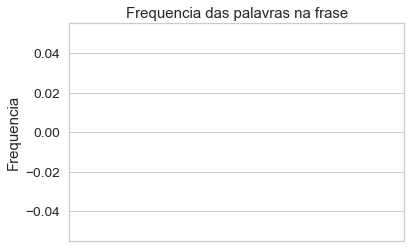

In [175]:
from nltk import FreqDist
frequencia = FreqDist(palavras_tokenize)

import numpy as np
import matplotlib.pyplot as plt

palavras_tokenize = frequencia.keys()
y_pos = np.arange(len(palavras_tokenize))
contagem = frequencia.values()
plt.bar(y_pos, contagem, align='center', alpha=0.5)
plt.xticks(y_pos, palavras_tokenize)
plt.ylabel('Frequencia')
plt.title('Frequencia das palavras na frase')
plt.show()

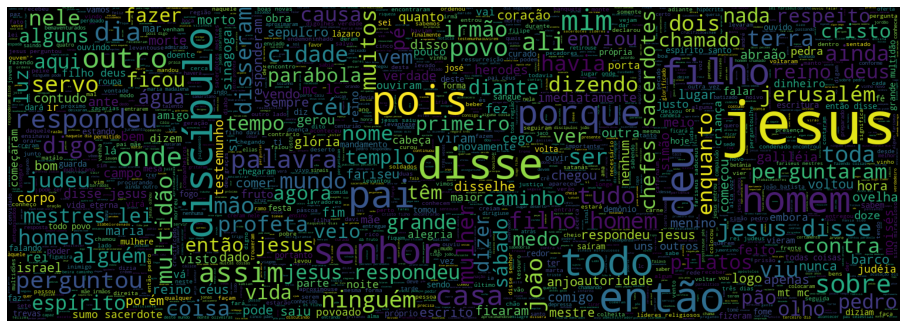

In [188]:
texts = dados_limpos['texts']
all_texts= " ".join(s for s in texts)

#def RemoviStopWords(all_texts):
    #all_texts = all_texts.lower()
    #stop_words = set(nltk.corpus.stopwords.words("portuguese"))
    #palavras = [i for i in all_texts.split() if not i in stop_words]
    #return ("".join(palavras))

#print(palavras)


stop_words = set(nltk.corpus.stopwords.words("portuguese"))
from wordcloud import WordCloud, ImageColorGenerator
wordcloud = WordCloud(stopwords=stop_words,max_font_size=100, width = 1520, height = 535,max_words=6500).generate(all_texts)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file("gospels_wordclouds.png") #Salva quando tiver certeza que está ok."""

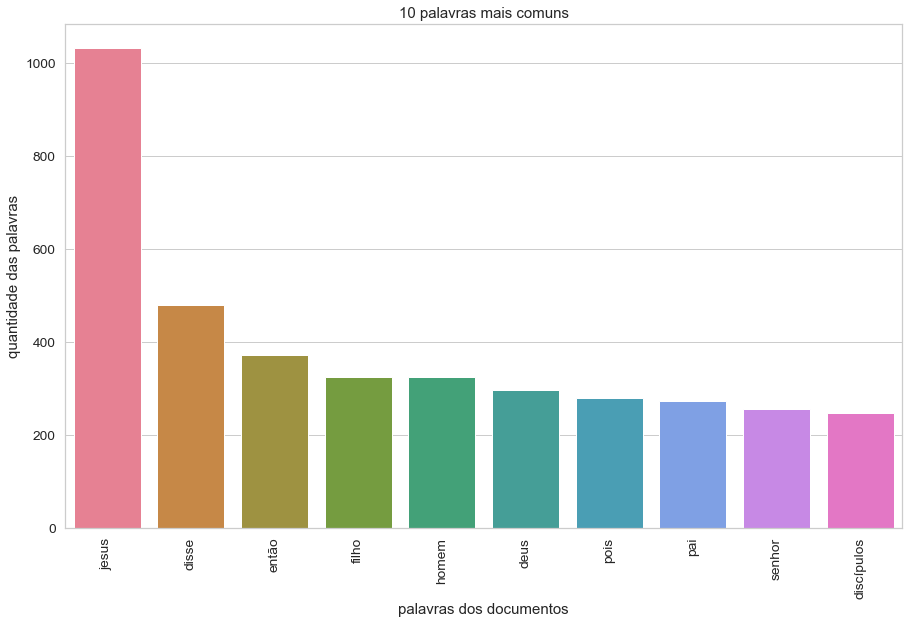

AttributeError: module 'matplotlib.pyplot' has no attribute 'save_to_file'

In [195]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline



# Helper function
def plot_10_palavras_mais_comuns(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    palavras_tokenize = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(palavras_tokenize))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(palavras_tokenize, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    palavras_tokenize = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(palavras_tokenize)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 palavras mais comuns')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, palavras_tokenize, rotation=90) 
    plt.xlabel('palavras dos documentos')
    plt.ylabel('quantidade das palavras')
    plt.show()
    plt.save_to_file("10 palavras mais comuns.png")
    
#importar as stopwordsem portugues    
stop_words = set(nltk.corpus.stopwords.words("portuguese"))

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=stop_words)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(dados_limpos['texts'])
# Visualise the 10 most common words
plot_10_palavras_mais_comuns(count_data, count_vectorizer)


In [194]:
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    palavras_tokenize = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopicos #%d:" % topic_idx)
        print(" ".join([palavras_tokenize[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 7
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topicos encontrados via LDA:")
print_topics(lda, count_vectorizer, number_words)
plt.figure(figsize=(16,9))
plt.save_to_file("Topicos_encontrados_via_LDA.png")

Topicos encontrados via LDA:

Topicos #0:
gerou jesus pois filho céus enquanto reino dito davi discípulos

Topicos #1:
jesus disse então pai deus discípulos homem pois joão porque

Topicos #2:
filho jesus pilatos então disse deus homem porque terra pai

Topicos #3:
jesus disse homem então senhor pois deus respondeu filho discípulos

Topicos #4:
senhor pai deus ovelhas disse menino povo então porque anjo

Topicos #5:
jesus deus pai mim disse mundo porque pois lei ninguém

Topicos #6:
jesus disse pedro então discípulos homem pai filho respondeu pois


AttributeError: module 'matplotlib.pyplot' has no attribute 'save_to_file'

<Figure size 1152x648 with 0 Axes>

In [186]:
#Analizando o modelo
import time
%time
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared= sklearn_lda.prepare(lda, count_data, count_vectorizer)
    
    with open(LDAvis_data_filepath, 'w') as f:
        pickle.dump(LDAvis_prepared, f)
        
        # load the pre-prepared pyLDAvis data from disk
    with open(LDAvis_data_filepath) as f:
        LDAvis_prepared = pickle.load(f)
        pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

Wall time: 0 ns


TypeError: write() argument must be str, not bytes